In [1]:
%load_ext autoreload
%autoreload 2
# provide cell timings
%load_ext autotime
from qdef import *
%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'
import sympy as sp
from ipywidgets import interact, interact_manual
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matrixgoodies import *
from uncertainties import ufloat
plt.style.use('dark_background')

Reloading /Users/juan/Zia Lab/Codebase/qdef/data/CPGs.pkl ...


In [198]:
brik = pd.read_excel('./data/brik_and_ma_from_cowan.xlsx')
brik['Z'] = brik['Element'].apply(lambda x: symb_to_num[x])

In [199]:
pickle.dump(brik, open('./data/brik_ma_cowan.pkl','wb'))

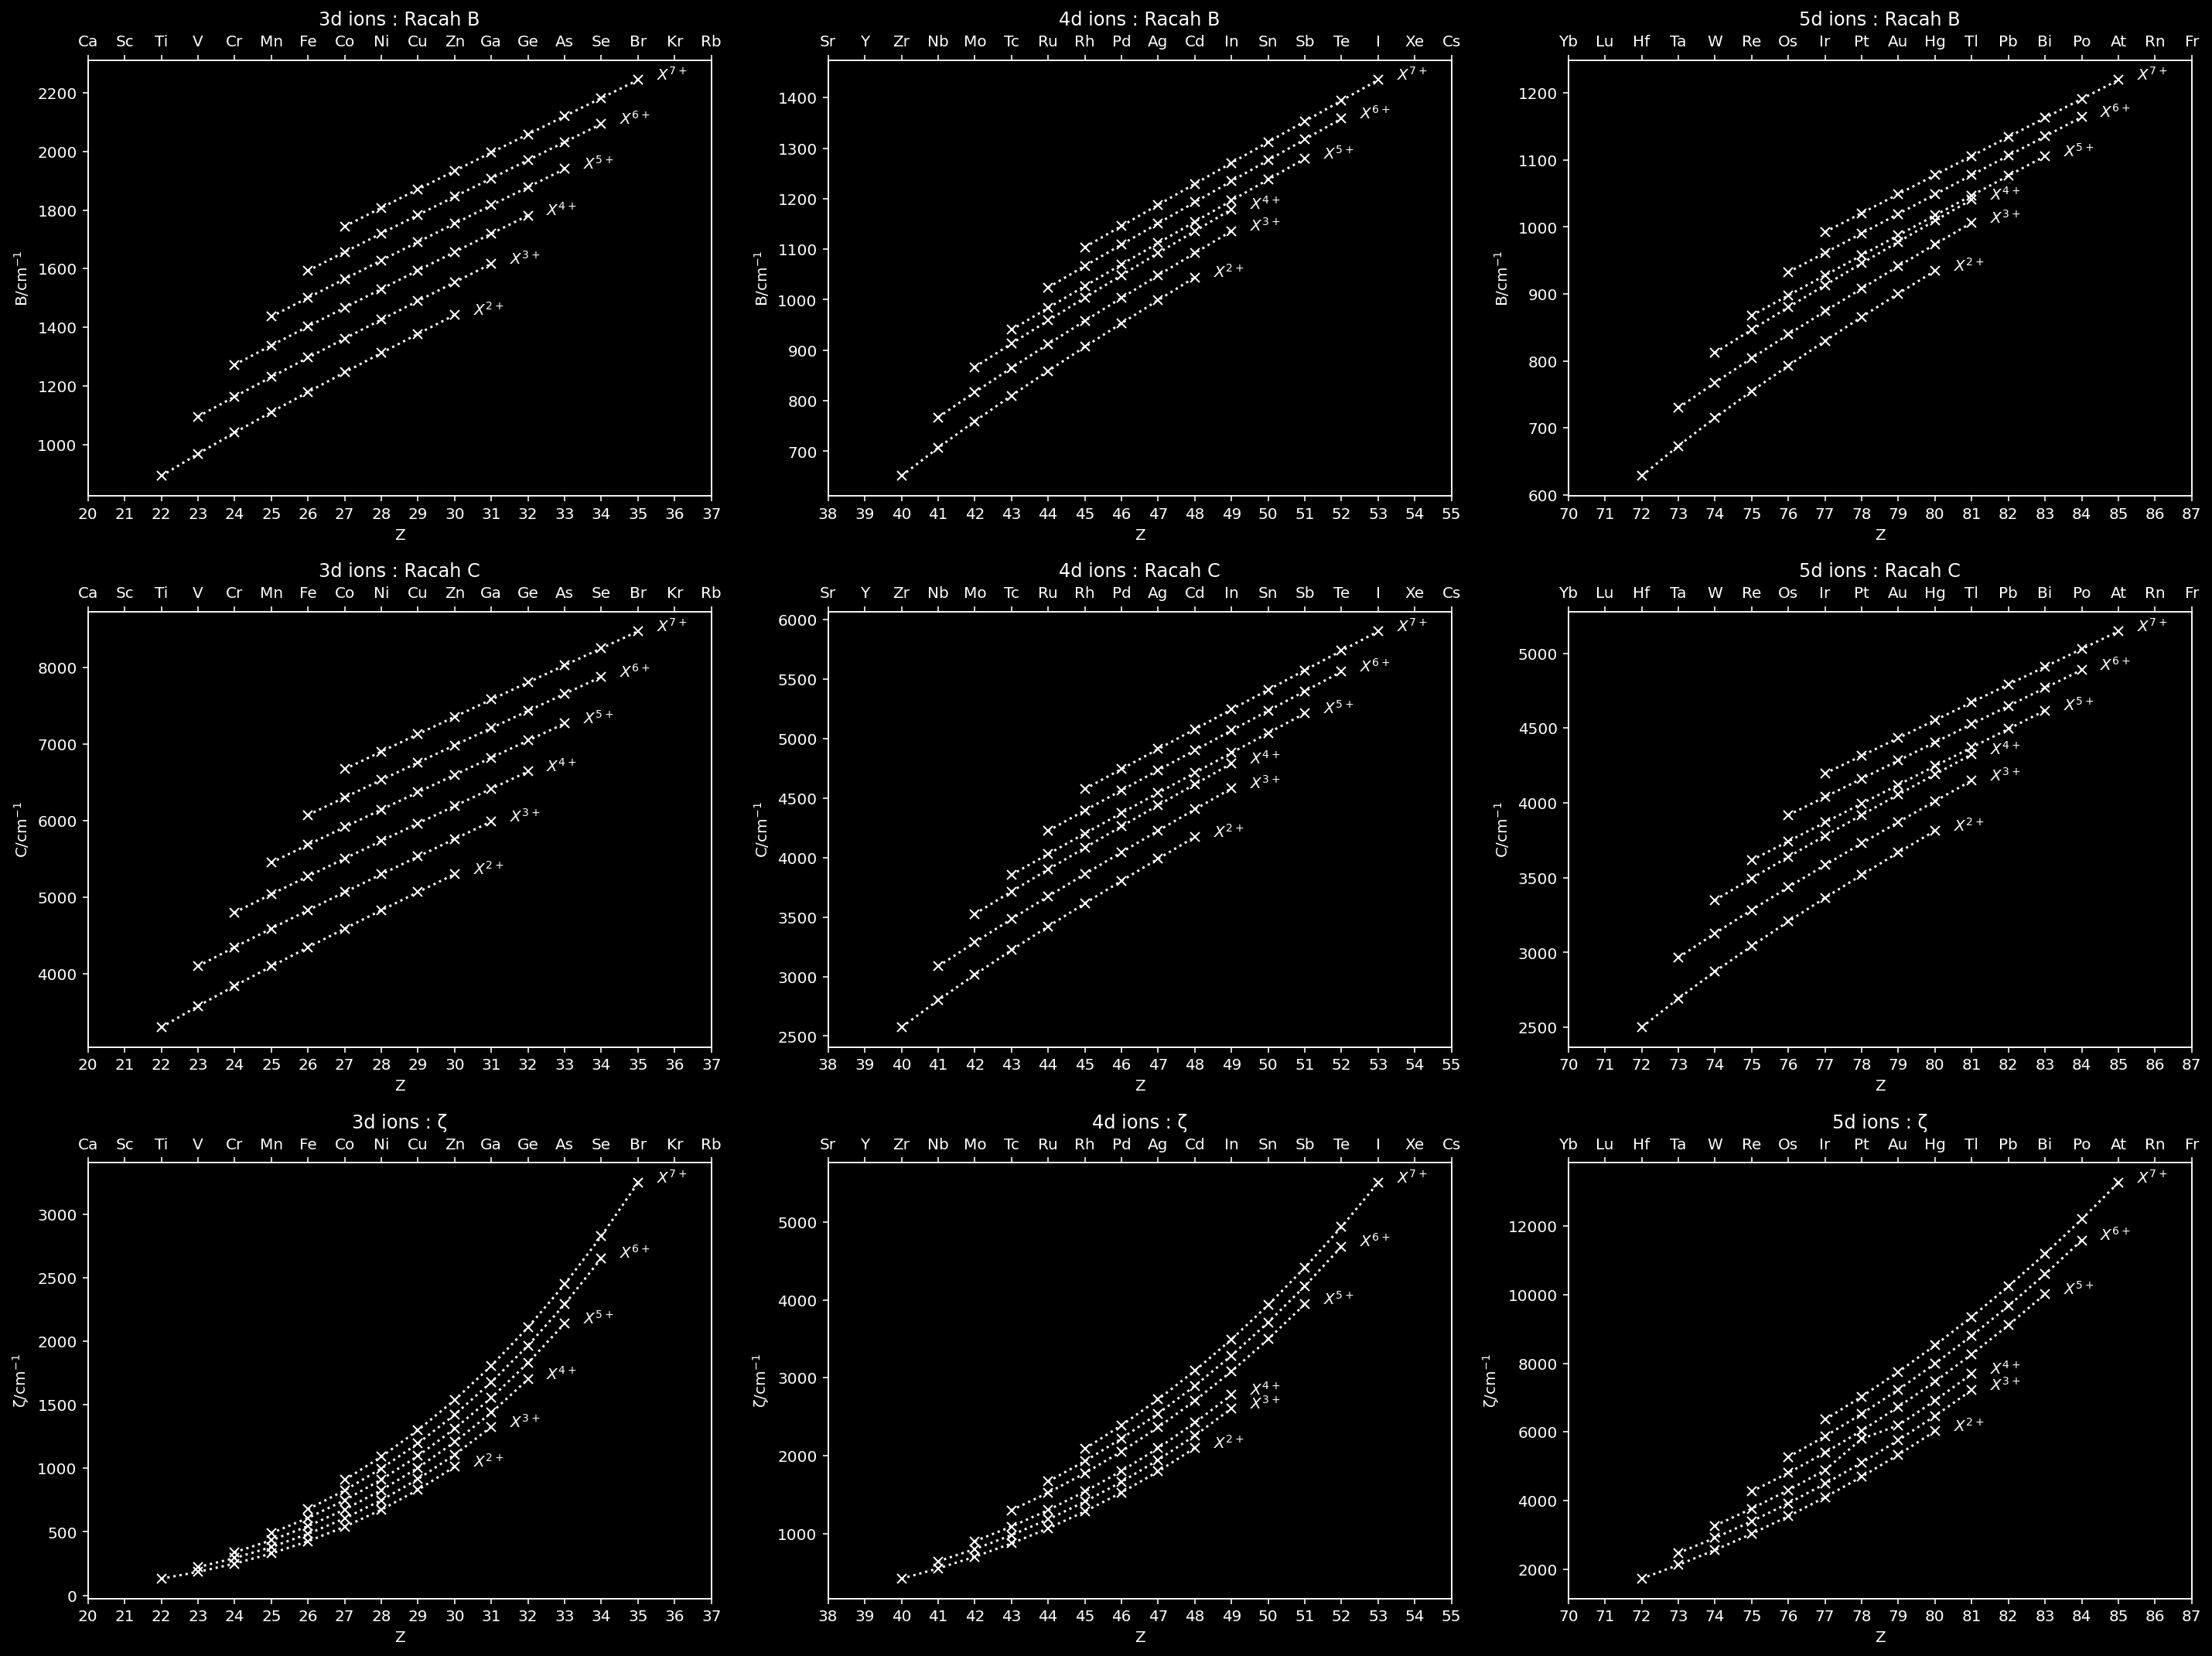

In [200]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (20,10/2*3))
for col_idx, n in enumerate([3,4,5]):
    ax1 = axes[0][col_idx]
    ax1top = ax1.twiny()
    ax2 = axes[1][col_idx]
    ax2top = ax2.twiny()
    ax3 = axes[2][col_idx]
    ax3top = ax3.twiny()
    
    for charge_idx, charge in enumerate([2,3,4,5,6,7]):
        sub_brik = brik[(brik['n'] == n) & (brik['Charge'] == charge)]
        sub_brik = sub_brik[~sub_brik['A/cm^-1'].apply(np.isnan)]
        axlegend = '$X^{%d+}$' % (charge)
        ax1.plot(sub_brik['Z'], sub_brik['B/cm^-1'],'wx:',label=axlegend)
        ax1.text(np.max(sub_brik['Z'])+0.5, np.max(sub_brik['B/cm^-1']), axlegend, c='w')
        ax2.plot(sub_brik['Z'], sub_brik['C/cm^-1'], 'wx:', label = ax2legend)
        ax2.text(np.max(sub_brik['Z'])+0.5, np.max(sub_brik['C/cm^-1']), axlegend, c='w')
        ax3.plot(sub_brik['Z'], sub_brik['ζd/cm^-1'], 'wx:', label = ax2legend)
        ax3.text(np.max(sub_brik['Z'])+0.5, np.max(sub_brik['ζd/cm^-1']), axlegend, c='w')
    
    ax1.set_title('%dd ions : Racah B' % (n))
    ax2.set_title('%dd ions : Racah C' % (n))
    ax3.set_title('%dd ions : ζ' % (n))
    # ax3.set_yscale('log')

    xmin = {3:22,4:40,5:72}[n]
    xmax = {3:35,4:53,5:85}[n]
    xticks_labels = [num_to_symb[Z] for Z in range(xmin-2, xmax + 3)]

    for ax in [ax1, ax2, ax3]:
        ax.tick_params(axis='y', labelcolor='w')
        ax.set_xlabel('Z')
        ax.set_xticks(range(xmin-2, xmax + 3))

    ax1.set_ylabel('B/cm${}^{-1}$')
    ax2.set_ylabel('C/cm${}^{-1}$')
    ax3.set_ylabel('ζ/cm${}^{-1}$')

    
    for ax in [ax1top, ax2top, ax3top]:
        ax.set_xticks(range(xmin-2, xmax + 3), xticks_labels)
        ax.set_xlim(xmin-2, xmax + 2)

plt.tight_layout()
plt.show()

In [197]:
for col_idx, n in enumerate([3,4,5]):
    for charge_idx, charge in enumerate([2,3,4,5,6,7]):
        sub_brik = brik[(brik['n'] == n) & (brik['Charge'] == charge)]
        sub_brik = sub_brik[~sub_brik['A/cm^-1'].apply(np.isnan)]
        print(n, charge)
        print('B',np.polyfit(sub_brik['Z'], sub_brik['B/cm^-1'],1))
        print('C',np.polyfit(sub_brik['Z'], sub_brik['C/cm^-1'],1))
        print('ζd',np.polyfit(sub_brik['Z'], np.power(sub_brik['ζd/cm^-1'],1/4), 1))

3 2
B [  68.47033333 -606.24977778]
C [  249.302      -2157.75422222]
ζd [ 0.28100344 -2.7755215 ]
3 3
B [  65.15966667 -400.30877778]
C [  236.08783333 -1320.12705556]
ζd [ 0.27153813 -2.37585333]
3 4
B [  63.68183333 -253.978     ]
C [ 230.10933333 -715.50577778]
ζd [ 0.2658978 -2.0839265]
3 5
B [  62.97283333 -136.11661111]
C [ 227.2215     -223.76905556]
ζd [ 0.2621275  -1.84699702]
3 6
B [ 62.63233333 -33.97555556]
C [225.8285     205.25277778]
ζd [ 0.25942737 -1.6427864 ]
3 7
B [62.4855     58.53616667]
C [225.2205     595.90783333]
ζd [ 0.25740438 -1.46002177]
4 2
B [   48.90466667 -1297.382     ]
C [  198.99383333 -5354.31533333]
ζd [ 0.27899871 -6.59070728]
4 3
B [   46.00383333 -1114.68694444]
C [  186.572      -4546.07666667]
ζd [ 0.26326679 -5.73711887]
4 4
B [   44.60428571 -1004.745     ]
C [  180.47607143 -4045.305     ]
ζd [ 0.25455402 -5.20168288]
4 5
B [  42.35766667 -879.59366667]
C [  169.58333333 -3431.00888889]
ζd [ 0.24037428 -4.32892383]
4 6
B [  41.77466667 -81

In [ ]:
# fig, axes = plt.subplots(ncols = 3, nrows = 6, figsize = (20,30))
# for col_idx, n in enumerate([3,4,5]):
#     for row_idx, charge in enumerate([2,3,4,5,6,7]):
#         sub_brik = brik[(brik['n'] == n) & (brik['Charge'] == charge)]
#         ax1 = axes[row_idx][col_idx]
#         ax1.plot(sub_brik['Z'], sub_brik['B  / cm^-1'],'bo',label='B')
#         ax2 = ax1.twinx()
#         x, y = sub_brik['Z'], sub_brik['C  / cm^-1']
#         ax2.plot(x, y, 'rx', label='C')
#         ax1.set_title('%s %dd ions' % ({2:'Divalent',3:'Trivalent',4:'Tetravalent',5:'Pentavalent',6:'Hexavalent',7:'Septavalent'}[charge], n))
#         ax1.set_xlabel('Z')
#         ax1.set_ylabel('B/cm${}^{-1}$')
#         ax2.set_ylabel('C/cm${}^{-1}$')
#         ax2.set_ylim(2500, 8500)
#         ax1.set_ylim(500,2500)
#         ax1.legend(loc=0)
#         ax2.legend(loc=1)
# plt.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize = (20,10))
# for col_idx, n in enumerate([3,4,5]):
#     ax1 = axes[col_idx]
#     ax2 = ax1.twinx()
#     ax3 = ax1.twiny()
#     for row_idx, charge in enumerate([2,3,4,5,6,7]):
#         sub_brik = brik[(brik['n'] == n) & (brik['Charge'] == charge)]
#         sub_brik = sub_brik[~sub_brik['A  / cm^-1'].apply(np.isnan)]
#         ax1legend = '$X^{%d+}$' % (charge)
#         ax2legend = '$X^{%d+}$' % (charge)
#         ax1.plot(sub_brik['Z'], sub_brik['B  / cm^-1'],'co--',label=ax1legend)
        
#         x, y = sub_brik['Z'], sub_brik['C  / cm^-1']
#         ax2.plot(x, y, 'yx:', label = ax2legend)
#         ax1.set_title('%dd ions' % (n))
#         ax1.annotate(ax1legend, (np.min(sub_brik['Z']), np.min(sub_brik['B  / cm^-1'])), 
#         (np.min(sub_brik['Z'])-0.5, 100 + np.min(sub_brik['B  / cm^-1'])), c='c', 
#         arrowprops=dict(arrowstyle='->'),
#             horizontalalignment='right', verticalalignment='center')
#         ax2.text(np.max(sub_brik['Z'])+0.5, np.max(sub_brik['C  / cm^-1']), ax2legend, c='y')
#     ax1.set_xlabel('Z')
#     ax1.set_ylabel('B/cm${}^{-1}$')
#     ax2.set_ylabel('C/cm${}^{-1}$')
#     ax1.tick_params(axis='y', labelcolor='c')
#     ax2.tick_params(axis='y', labelcolor='y')
#     ymin1 = {3:750, 4:500, 5:600}[n]
#     ymax1 = {3:2300, 4:1500, 5:1200}[n]
#     ymin2 = {3:3000, 4:3000, 5:2000}[n]
#     ymax2 = {3:9000, 4:6000, 5:5500}[n]
#     ax2.set_ylim(ymin2, ymax2)
#     ax1.set_ylim(ymin1,ymax1)
#     xmin = {3:22,4:40,5:72}[n]
#     xmax = {3:35,4:53,5:85}[n]
#     ax1.set_xticks(range(xmin-2, xmax + 3))
#     xticks_labels = [num_to_symb[Z] for Z in range(xmin-2, xmax + 3)]
#     ax3.set_xticks(range(xmin-2, xmax + 3), xticks_labels)
#     ax3.set_xlim(xmin-2, xmax + 2)
# plt.tight_layout()
# plt.show()

In [164]:
charge

7

array([   28.39866667, -1194.30088889])